In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


https://www.youtube.com/watch?v=jztwpsIzEGc&t=737s


In [ ]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install tensorflow-gpu==2.7.0


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.7.0


In [3]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
gpu

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [6]:
len(gpu)

2

**Remove dodgy images**

In [7]:
import cv2
import imghdr

imghdr is a module in Python's standard library used for determining the type of image contained in a file or byte stream. It provides a function imghdr.what() that takes either a file path or a binary data stream as input and returns a string indicating the detected image type (e.g., 'jpeg', 'png', 'gif', 'bmp', etc.), or None if the data is not recognized as a valid image format.

In [8]:
!git clone https://github.com/nicknochnack/ImageClassification

Cloning into 'ImageClassification'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 312 (delta 0), reused 0 (delta 0), pack-reused 309
Receiving objects: 100% (312/312), 106.29 MiB | 31.70 MiB/s, done.


In [9]:
data_dir = 'ImageClassification/data'

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):  # removing the unknown format of the image. only including the jpeg,jpg,bmp,png
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
os.listdir(os.path.join(data_dir,'happy'))

['images36.jpg',
 'image4.jpeg',
 '8cxKy5g9i.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'happypeople-1024x679.jpg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 'THPC_Logo-jpeg.jpg',
 'images24.jpg',
 'getty_494581822_130796.jpg',
 'the-habits-of-happy-people-a-meditation-day-course-611337.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'images26.jpg',
 'images12.jpg',
 'image8.jpeg',
 'image5.jpeg',
 'Happy-people-800x533.jpg',
 'image24.jpeg',
 'happy-people.jpg',
 'images11.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'happy-woman-in-nature-at-sunset.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'Happy_People_Happy_Man.jpg',
 '60632274._UY200_.jpg',
 'images31.jpg',
 'physed-happiness-facebookJumbo.jpg',
 'Travis-Bradberry-Happy.jpg',
 'group-of-happy-people-2.jpg',
 'image11.jpeg',
 '_happy_jumping_on_beach-40815.jpg',
 'images4.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'image28.jpeg',
 'smile.woman_.jpg',
 'image18.jpeg',
 'image2

In [13]:
for image_class in os.listdir(data_dir):
  print(image_class)


happy
sad


In [ ]:
img = cv2.imread(os.path.join('ImageClassification','data','happy','154006829.jpg'))
img


In [15]:
img.shape

(3744, 5616, 3)

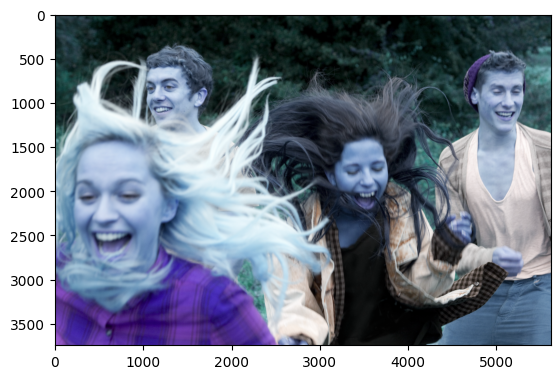

In [19]:
plt.imshow(img)  # observation: length above 3500 , width above 5000 , since it coloured image 3 channels

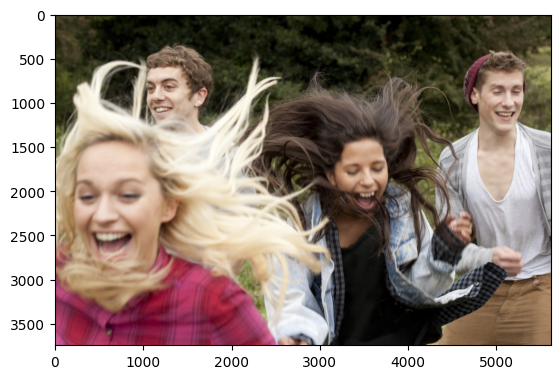

In [20]:
#opencv reads the image in  bgr, matplot expects to be rgb
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


**load data**

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data = tf.keras.utils.image_dataset_from_directory('ImageClassification/data') # dataset api- datapipeline direct function # no need of labels , classes. it also resize the image as well.

Found 305 files belonging to 2 classes.


In [24]:
tf.data.Dataset?? # help tab is opened. give documentation of tensorflow dataset

SyntaxError: invalid syntax (<ipython-input-24-a6f00a6ee9fa>, line 1)

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [23]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
data_iterator = data.as_numpy_iterator() #to evaluate in batches; This line converts your TensorFlow dataset data into a Python iterator that yields batches of data as NumPy arrays. You can iterate over this iterator to access batches of data for training or evaluation.
#helpful for massive amount of data


In [27]:
batch = data_iterator.next()

This line will fetch the next batch of data from the iterator and assign it to the variable batch. Each element of batch will contain a tuple (images, labels) where images is a NumPy array containing a batch of images and labels is a NumPy array containing the corresponding labels. You can then use this batch for training or evaluation in your TensorFlow model

In [28]:
batch

(array([[[[105.07422  , 109.07422  , 118.07422  ],
          [107.333984 , 111.22266  , 120.22266  ],
          [110.37109  , 113.37109  , 122.37109  ],
          ...,
          [121.25781  , 119.81445  , 129.70117  ],
          [122.       , 120.       , 131.       ],
          [122.       , 120.       , 131.       ]],
 
         [[105.07422  , 109.07422  , 118.07422  ],
          [107.333984 , 111.22266  , 120.22266  ],
          [110.58346  , 113.26491  , 122.37109  ],
          ...,
          [121.25781  , 119.81445  , 129.70117  ],
          [122.       , 120.       , 131.       ],
          [122.       , 120.       , 131.       ]],
 
         [[105.36133  , 109.07422  , 118.07422  ],
          [107.65306  , 111.19069  , 120.22266  ],
          [111.20986  , 112.951706 , 122.37109  ],
          ...,
          [121.25781  , 119.81445  , 129.70117  ],
          [122.       , 120.       , 131.       ],
          [122.       , 120.       , 131.       ]],
 
         ...,
 
         [[1

In [29]:
len(batch)

2

In [30]:
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

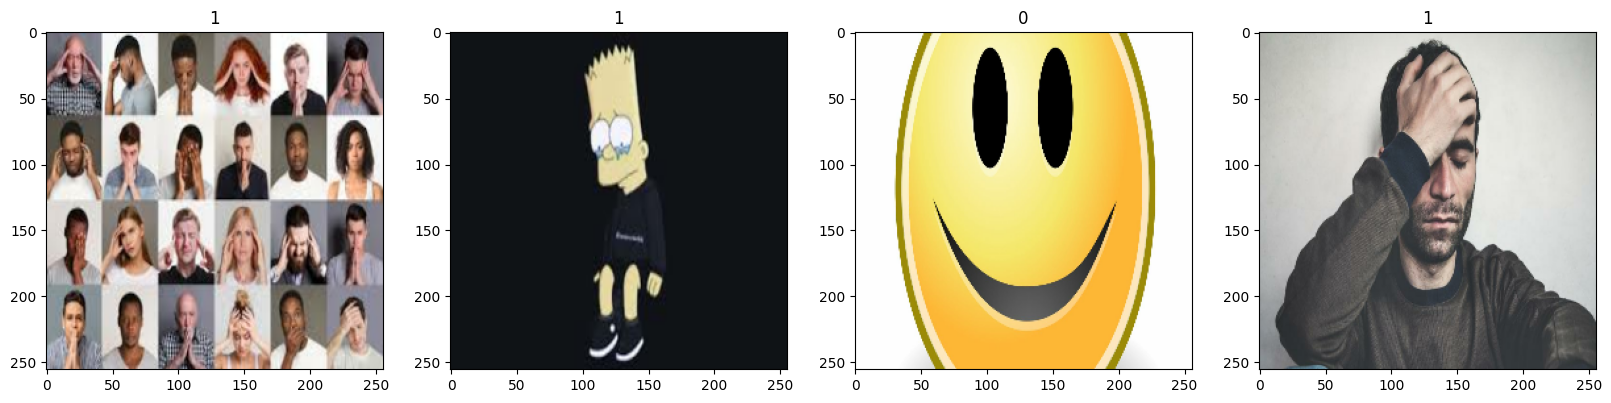

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

observation: 0 - happy and 1 - sad

In [33]:
#get another batch from iterator
batch = data_iterator.next()

In [34]:
batch[1]# got new batch

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

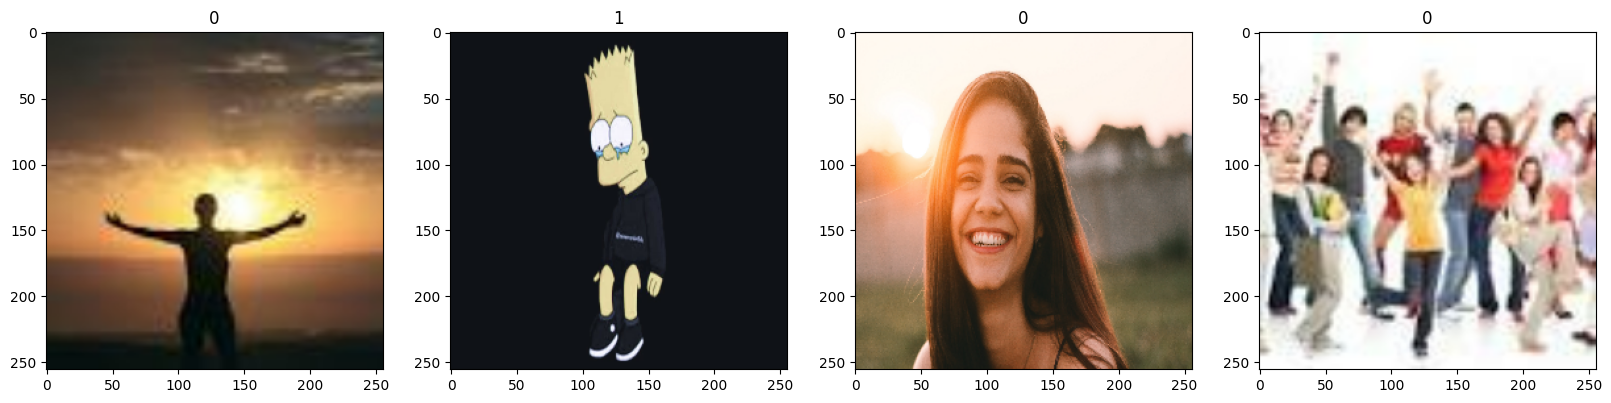

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [36]:
batch[0].max()

255.0

**Preprocessing**

instead of scaling in 0 to 255, do it in 0 to 1. It helps deep learning generalize faster. And going to split into train test valid to avoid overfit

Scale the data

In [37]:
scaled = batch[0]/255
scaled.max()

1.0

In [38]:
data = data.map(lambda x,y: (x/255,y)) # The map() function in Python is used to apply a function to each item in an iterable (like a list or a dataset) and return a new iterable with the results.
# x= image, y = label or target variable

In [39]:
# to check other data set tensor pipeline functions check this https://www.tensorflow.org/guide/data

In [40]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 0.9843137 ],
          [1.        , 1.        , 0.9843137 ],
          [1.        , 1.        , 0.9843137 ],
          ...,
          [0.95088845, 0.9587316 , 0.95481   ],
          [0.9493566 , 0.95719975, 0.9532782 ],
          [0.9490196 , 0.95686275, 0.9529412 ]],
 
         [[1.        , 1.        , 0.98498774],
          [1.        , 1.        , 0.98498774],
          [1.        , 1.        , 0.98498774],
          ...,
          [0.95088845, 0.9587316 , 0.95481   ],
          [0.9493566 , 0.95719975, 0.9532782 ],
          [0.9490196 , 0.95686275, 0.9529412 ]],
 
         [[1.        , 1.        , 0.9880515 ],
          [1.        , 1.        , 0.9880515 ],
          [1.        , 1.        , 0.9880515 ],
          ...,
          [0.95088845, 0.9587316 , 0.95481   ],
          [0.9493566 , 0.95719975, 0.9532782 ],
          [0.9490196 , 0.95686275, 0.9529412 ]],
 
         ...,
 
         [[0.47356004, 0.27356005, 0.20689338],
          [0.47047

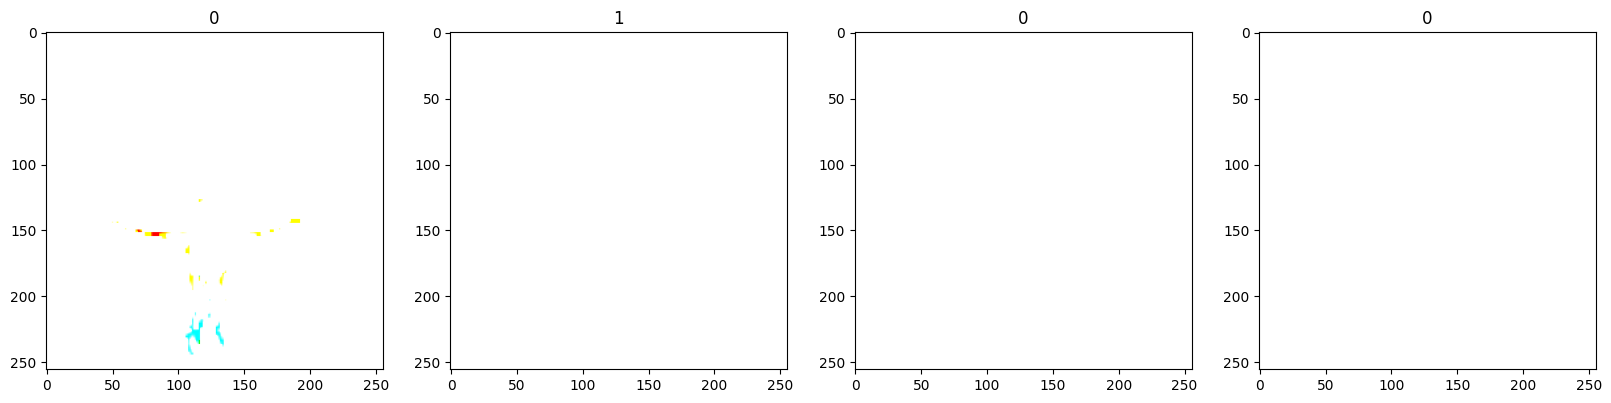

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [42]:
scaled_iterator = data.as_numpy_iterator()


In [43]:
batch = scaled_iterator.next()

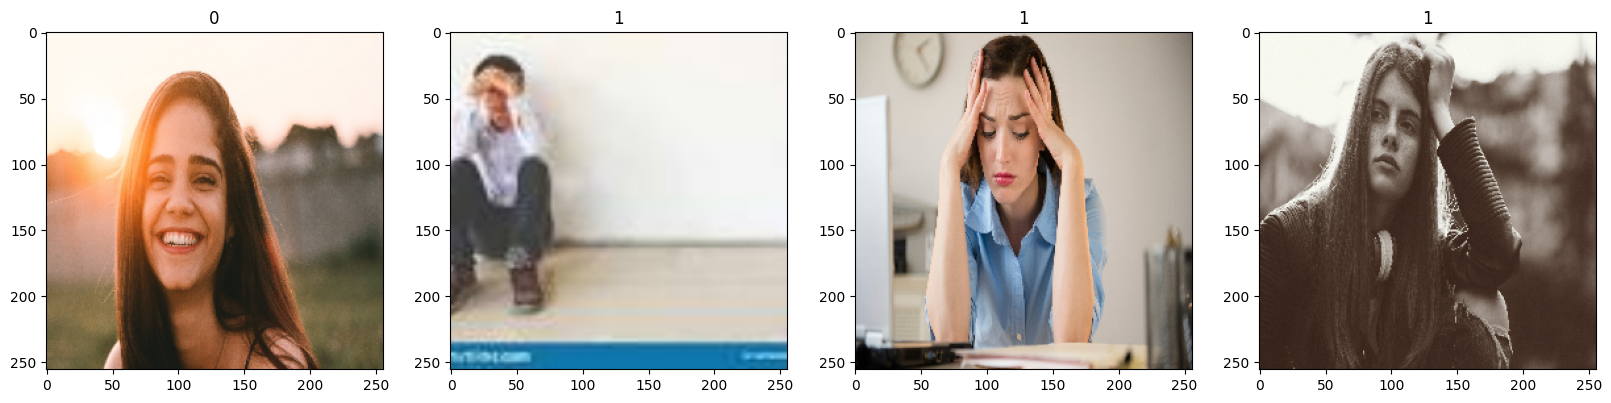

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [45]:
batch[0].max()

1.0

**Split data**


In [46]:
len(data)

10

In [47]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [48]:
train_size

7

In [49]:
train_size+val_size+test_size # verify

10

In [50]:
# split using 'take' and 'skip' methods available in tensorflow
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [51]:
len(train)

7

**deep  model**

Build deep leaning model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
# 1st convolution has 16 filters of size 3X3, stride =1
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [ ]:
#tf.optimizers. - to see list of optimizers

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Train

In [57]:
logdir = 'logs' # to store the various metrics during training

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 11s 532ms/step - loss: 0.7785 - accuracy: 0.5491 - val_loss: 0.5844 - val_accuracy: 0.6250
Epoch 2/20
7/7 [==============================] - 6s 524ms/step - loss: 0.6042 - accuracy: 0.6875 - val_loss: 0.5548 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 5s 505ms/step - loss: 0.5365 - accuracy: 0.7411 - val_loss: 0.6274 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 6s 545ms/step - loss: 0.4839 - accuracy: 0.8348 - val_loss: 0.4080 - val_accuracy: 0.8281
Epoch 5/20
7/7 [==============================] - 8s 966ms/step - loss: 0.3406 - accuracy: 0.8616 - val_loss: 0.3218 - val_accuracy: 0.8438
Epoch 6/20
7/7 [==============================] - 6s 525ms/step - loss: 0.2618 - accuracy: 0.8929 - val_loss: 0.3601 - val_accuracy: 0.7969
Epoch 7/20
7/7 [==============================] - 6s 521ms/step - loss: 0.2199 - accuracy: 0.9330 - val_loss: 0.1279 - val_accuracy: 0.9844
Epoch 8/20
7/7 [===

In [61]:
hist.history # display accuracy, validation and loss information

{'loss': [0.7785391211509705,
  0.6041566133499146,
  0.5365301966667175,
  0.48386621475219727,
  0.3405788838863373,
  0.2617970407009125,
  0.21987232565879822,
  0.1760697364807129,
  0.12504656612873077,
  0.09550350159406662,
  0.0933687835931778,
  0.07385943084955215,
  0.07168130576610565,
  0.04427039995789528,
  0.04390953108668327,
  0.021985096856951714,
  0.018878895789384842,
  0.014440205879509449,
  0.01648508943617344,
  0.012158085592091084],
 'accuracy': [0.5491071343421936,
  0.6875,
  0.7410714030265808,
  0.8348214030265808,
  0.8616071343421936,
  0.8928571343421936,
  0.9330357313156128,
  0.9241071343421936,
  0.9776785969734192,
  0.96875,
  0.9642857313156128,
  0.9821428656578064,
  0.9821428656578064,
  0.9910714030265808,
  0.9776785969734192,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128],
 'val_loss': [0.5844384431838989,
  0.5547502040863037,
  0.6273874044418335,
  0.4079633951187134,
  0.

**Plot performance**

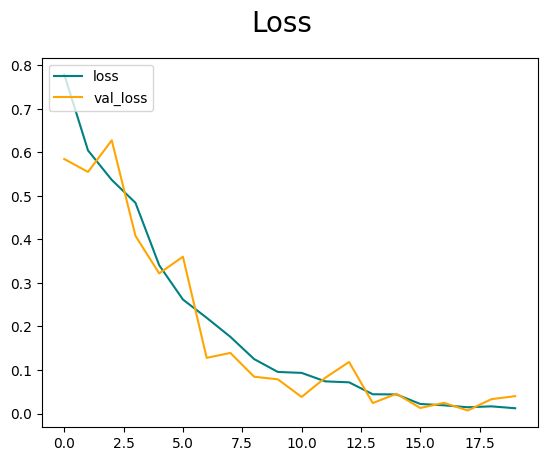

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

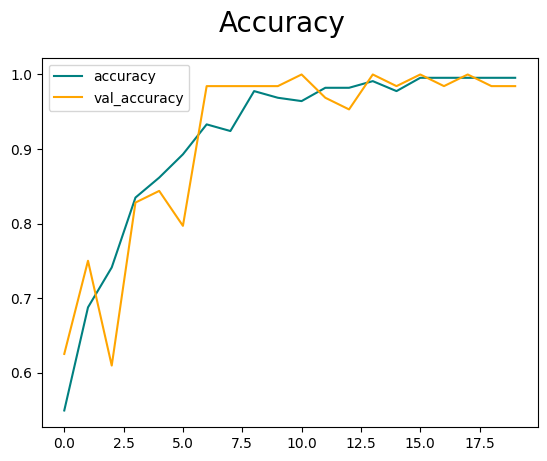

In [64]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate**

# validation loss , abnormal strike in decreasing function, then there is a overfitting , need top look into the trainig data

In [65]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [66]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
len(test)

1

In [69]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 1s 700ms/step


In [70]:
print(pre.result(),re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [72]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 1.0, Recall: 1.0, Accuracy: 1.0


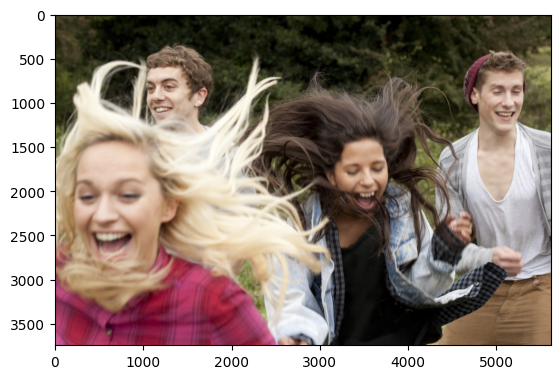

In [78]:
img = cv2.imread('ImageClassification/154006829.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

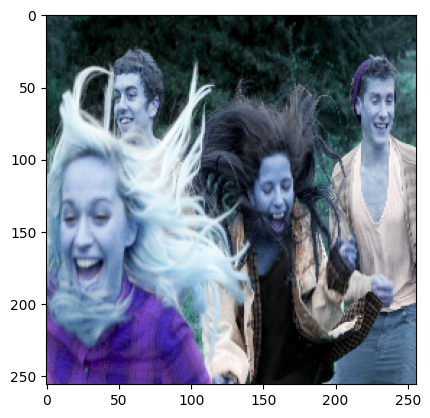

In [81]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0)

In [83]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 359ms/step


In [84]:
yhat

array([[0.03681983]], dtype=float32)

In [85]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


**Save the Model**

In [86]:
from tensorflow.keras.models import load_model

In [87]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
new_model = load_model('models/imageclassifier.h5')

In [92]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 119ms/step


array([[0.03681983]], dtype=float32)